Figure-SI1.ipynb
------------------------------------------------------------------------------
Purpose:  
- Generate Figure SI1 (panels A - D) illustrating sample representativeness by month across countries. 

Usage:
- Change fp variable to replication filepath.
- Run all cells.
  
Requirements:
- Python 3
- Packages: matplotlib 3.9.2, pandas 2.2.2, numpy 1.26.4

Inputs:
- sample_statistics/sample_nonus/sample_sizes_fua_{country}.csv (FUA-level sample size, produced on Spectus platform using process_trips_into_outputs_intl.ipynb)
- fua/FUA.csv (FUA-level population, produced from Global Human Settlement Layer data using processing_GHSL.ipynb)

Outputs:
- figures/figSI1.png


In [1]:
fp = '../'
fp_input = fp + 'data/'
fp_output = fp + 'figures/'


In [2]:
import matplotlib as mpl
mpl.rcParams['font.family'] = 'Helvetica'
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


### Read in data & create figure.

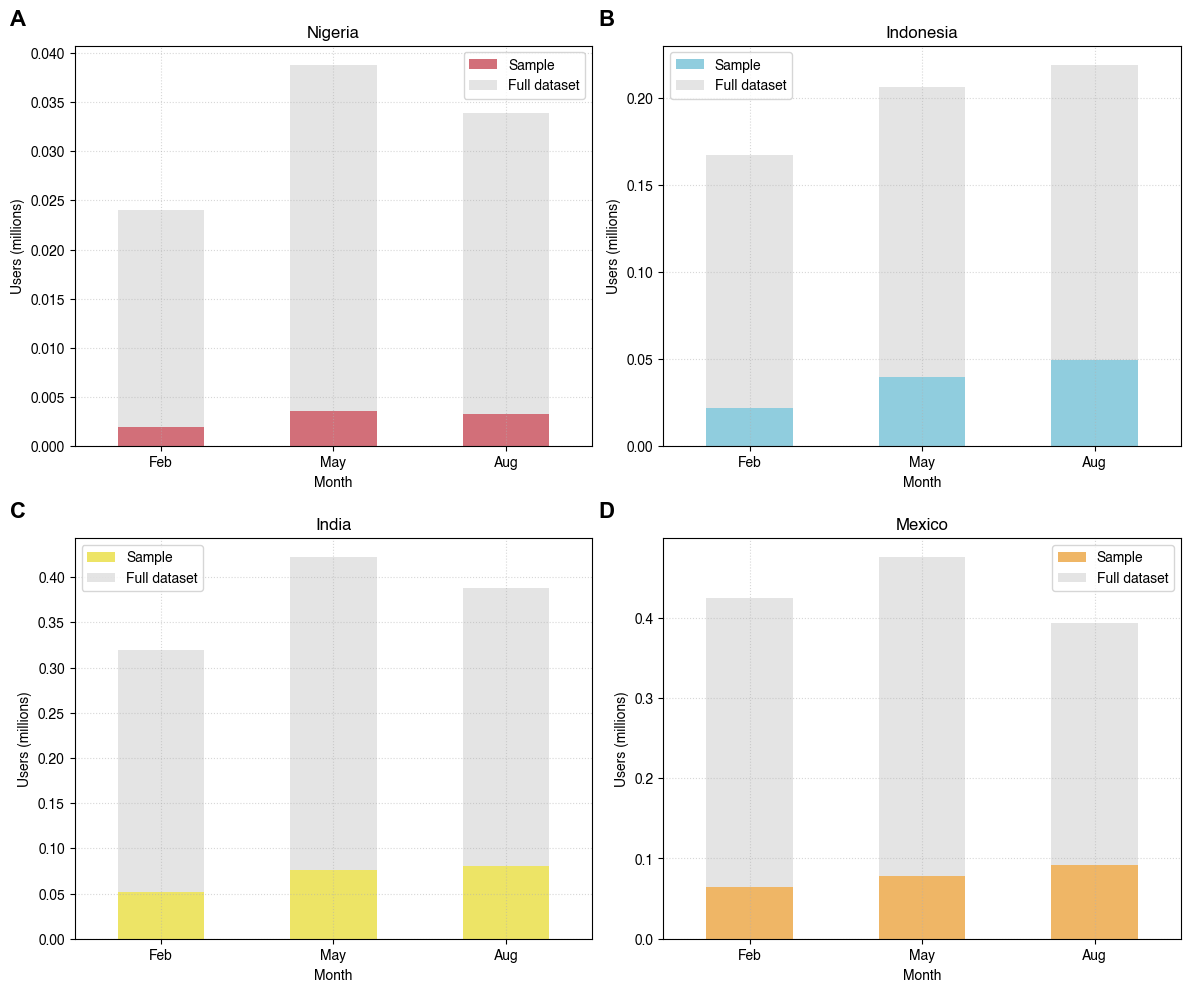

In [4]:
colors = {'ID': '#46ACC8',
            'IN': '#e2d200',
            'MX': '#E58601',
            'NG': '#B40F20'}

darkcolors = {'ID': '#0A81A1',
              'IN': '#A79B00',
              'MX': '#AF6703',
              'NG': '#920513' 
            }

## Total population counts in the raw Spectus data per month.
total_counts_nonus = {
"NG":{
"02":24078,
"05":38819,
"08":33929
},
"MX":{
"02":424433,
"05":475551,
"08":393632
},
"IN":{
"02":319693,
"05":422199,
"08":387600
},
"ID":{
"02":167166,
"05":206554,
"08":219347
}
}

labels = ['A','B','C','D']
countries = ['NG','ID','IN','MX']
countries_readable = {'NG':'Nigeria','ID':'Indonesia','IN':'India','MX':'Mexico'}


fig,axs = plt.subplots(2,2,figsize=(12,10))
mpl.rcParams['font.family'] = 'Helvetica'

mo_counts = []
i=0
for country in countries:
    sample_size_fua = pd.read_csv(f'{fp_input}/sample_statistics/sample_nonus/sample_sizes_fua_{country}.csv')

    sample_size_fua.columns = sample_size_fua.columns.str.lower()
    sample_size_fua['users'] = sample_size_fua.users.astype(int)
   
    mo_count = sample_size_fua[sample_size_fua['filter']==1].groupby(['month']).agg({'users':'sum'}).reset_index()
    mo_count['total_count'] = mo_count.month.apply(lambda x: total_counts_nonus[country][str(x).zfill(2)])
    mo_count['total_count'] = (mo_count['total_count'] - mo_count['users'])/1000000
    mo_count['users'] = (mo_count['users'])/1000000

    mo_count['country'] = country
    mo_counts.append(mo_count)
    mo_count[['users','total_count']].plot(kind='bar', stacked=True, color=[colors[country]]+['#D3D3D3'], ax=axs[i//2,i%2], alpha=.6, zorder=1)
    
    axs[i//2,i%2].grid(linestyle='dotted', alpha=.5, zorder = -1)
    axs[i//2,i%2].legend(['Sample','Full dataset'])
    
    axs[i//2,i%2].set_xlabel("Month")
    axs[i//2,i%2].set_ylabel("Users (millions)")
    
    axs[i//2,i%2].set_xticks(ticks = range(3), labels=['Feb','May','Aug'],rotation=0)
    axs[i//2,i%2].annotate(labels[i],xy=(-0.125,1.05), xycoords='axes fraction',
                    fontsize=16, fontname = 'Arial', weight='bold')
    

    axs[i//2,i%2].set_title(countries_readable[countries[i]])
    i+=1

fig.tight_layout()

fig.savefig(f'{fp_output}figSI1.png',dpi=300)

